# Introduction to Sampling and Hypothesis Testing

## Random Variables | Examples in R

In [2]:
# Select this cell and type Ctrl-Enter to execute the code below.

# install.packages("statip")
library(statip)

set_plot_dimensions <- function(width_choice, height_choice) {
    options(repr.plot.width = width_choice, repr.plot.height = height_choice)
}


### Bernoulli Distribution

The simplest discrete probability distribution is the **Bernoulli distribution**: 

$$B \sim \text{Bernoulli}(p)$$

This describes a situation where there are only two possible outcomes, labelled "success" ($B=1$) and "failure" ($B=0$).

The probability of obtaining a success is a constant, $p$.

$$
\begin{align*}
 \mathbb{P}(B = x) &= \begin{cases}
  p & \text{for $x=1$}\\
  1-p & \text{for $x=0$}
  \end{cases}
\\
\\
\mathbb{E}B &= 1 \cdot p + 0 \cdot (1-p) = p
\\
\\
\text{Var}B &= \mathbb{E}(B-p)^2 = (1-p)^2 \cdot p + (0-p)^2 \cdot (1-p) = p(1-p)
\end{align*}
$$


#### Example: rolling a six with one die


In [3]:
p <- 1 / 6
x <- 0:1
pmf <- dbern(x, p) # a Bernoulli distribution with p=1/6


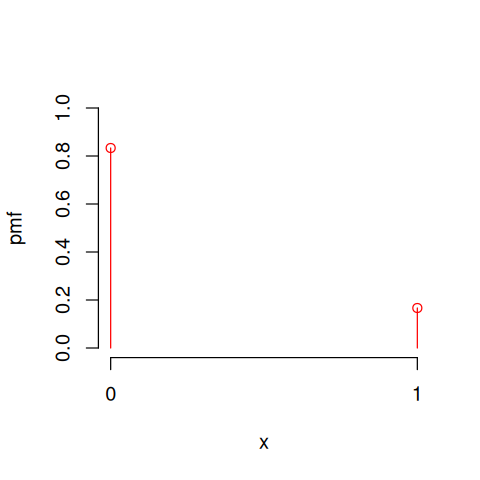

In [4]:
# plot the probability mass function

set_plot_dimensions(4, 4)
plot(x, pmf, ylim = c(0, 1), xlab = "x", type = "h", col = "red", axes = FALSE)
points(x, pmf, col = "red")
axis(side = 1, at = c(0, 1))
axis(side = 2)


In [5]:
# the expected value = p

expectation <- sum(x * pmf)
expectation


[1] 0.1666667

In [6]:
# the variance = p * (1-p)

variance <- sum((x - expectation)^2 * pmf)
variance


[1] 0.1388889

### Binomial Distribution

If $X$ is the number of successes in $n$ *independent and identically distributed* (i.i.d.) Bernoulli trials, with probability of success $p$, then $X$ is said to follow a **binomial distribution**: 

$$X = B_{1} + ... + B_{n} \sim \text{binom}(n,p)$$

The probability of obtaining $x$ successes is given by

$$
\begin{align*}
  \mathbb{P}(X = x) &= \binom{n}{x}p^{x}(1-p)^{n-x}.
\\
\\
\mathbb{E}X &= \mathbb{E}( B_{1} + \cdots + B_{n} ) = \mathbb{E}B_{1} + \cdots + \mathbb{E}B_{n} = np
\\
\\
\text{Var}X &= \text{Var}( B_{1} + \cdots + B_{n} ) = \text{Var}B_{1} + \cdots + \text{Var}B_{n} = np(1-p)
\end{align*}
$$


#### Example: number of sixes obtained when rolling ten dice


In [7]:
n <- 10
p <- 1 / 6
x <- 0:n


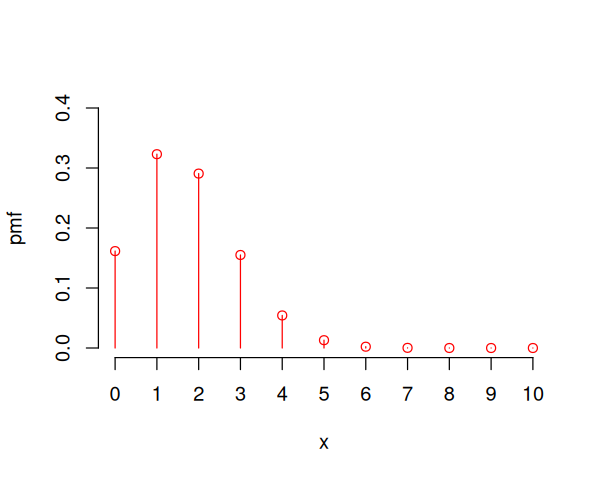

In [8]:
# plot the probability mass function

pmf <- dbinom(x, n, p) # a binomial distribution with n=10, p=1/6

set_plot_dimensions(5, 4)
plot(x, pmf, ylim = c(0, 0.4), xlab = "x", type = "h", col = "red", axes = FALSE)
points(x, pmf, col = "red")
axis(side = 1, at = 0:10)
axis(side = 2)


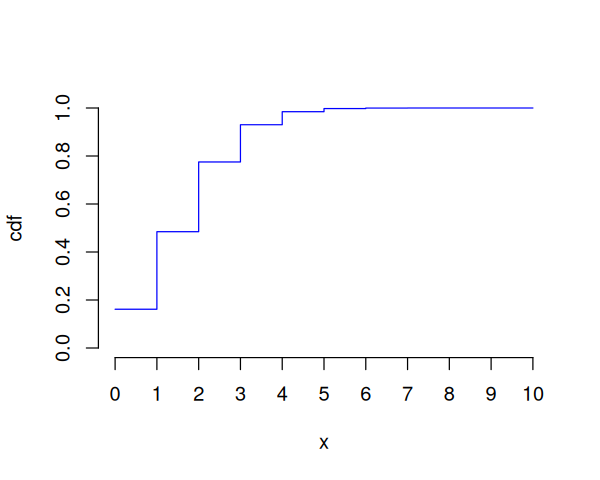

In [9]:
# plot the cumulative distribution function

cdf <- pbinom(x, n, p)

set_plot_dimensions(5, 4)
plot(x, cdf, ylim = c(0, 1), xlab = "x", type = "s", col = "blue", axes = FALSE)
axis(side = 1, at = x)
axis(side = 2)


In [10]:
# the expected value = n * p

expectation <- sum(x * pmf)
expectation


[1] 1.666667

In [11]:
# the variance = n * p * (1-p)

variance <- sum((x - expectation)^2 * pmf)
variance


[1] 1.388889

Calculate the probability of rolling one or more sixes.

In [12]:
1 - dbinom(0, n, p) # using the PMF at x=0


[1] 0.8384944

### Poisson Distribution

The **Poisson distribution** describes the number of observations of an event that is randomly distributed in space or time.

$$X \sim \text{Poisson}(\lambda)$$

e.g., number of radioactive decays in a second, number of accidents in a year, number of mutations on a chromosome.

The probability of observing $x$ events is given by

$$
\begin{align*}
  \mathbb{P}(X = x) &= \frac{e^{-\lambda}\lambda^{x}}{x!} \text{ for } x=0,1,2,...
\\
\\
\mathbb{E}X &= \lambda
\\
\\
\text{Var}X &= \lambda
\end{align*}
$$



In [14]:
lambda <- 4 # e.g. an average of 4 meteorite impacts per year.


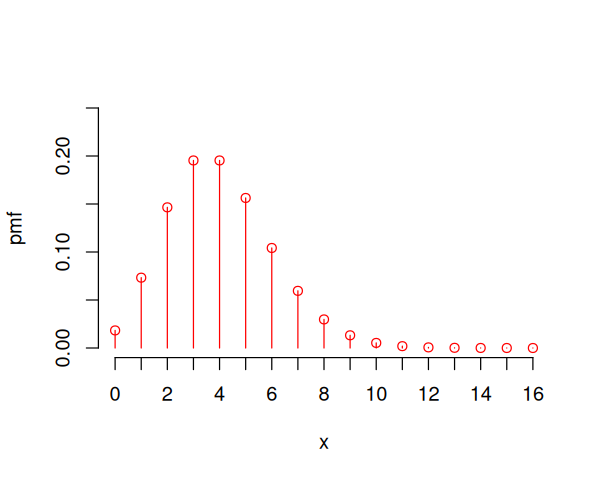

In [15]:
# plot the probability mass function

x <- 0:16
pmf <- dpois(x, lambda) # a Poisson distribution with lambda=4

set_plot_dimensions(5, 4)
plot(x, pmf, ylim = c(0, 0.25), xlab = "x", type = "h", col = "red", axes = FALSE)
points(x, pmf, col = "red")
axis(side = 1, at = x)
axis(side = 2)


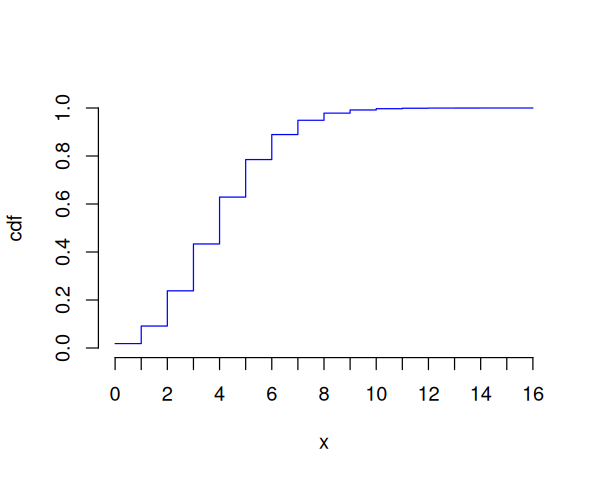

In [16]:
# plot the cumulative distribution function

cdf <- ppois(x, lambda)

set_plot_dimensions(5, 4)
plot(x, cdf, ylim = c(0, 1), xlab = "x", type = "s", col = "blue", axes = FALSE)
axis(side = 1, at = x)
axis(side = 2)


In [17]:
# the expected value = lambda

expectation <- sum(x * pmf) # approximates the sum for x->infinity
expectation


[1] 3.99998

In [18]:
# the variance = lambda

variance <- sum((x - expectation)^2 * pmf) # approximates the sum for x->infinity
variance


[1] 3.9998

What is the probability of observing between 2 and 4 meteorite impacts in a given year?

In [19]:
ppois(4, lambda) - ppois(1, lambda) # using the CDF


[1] 0.5372587

### Uniform Distribution

The **uniform distribution** describes a continuous random variable with a flat pdf over a specified interval.

$$X \sim U(a,b)$$

e.g. angle of a spinner, where $a=0$ and $b=360$.


$$
\begin{align*}
  f(x) &= \frac{1}{b-a} \text{ for } a \le x \le b
\\
\\
\mathbb{E}X &= \frac{1}{2}(a+b)
\\
\\
\text{Var}X &= \frac{1}{12}(b-a)^2
\end{align*}
$$



In [20]:
# e.g. angle of a spinner.
a <- 0
b <- 360

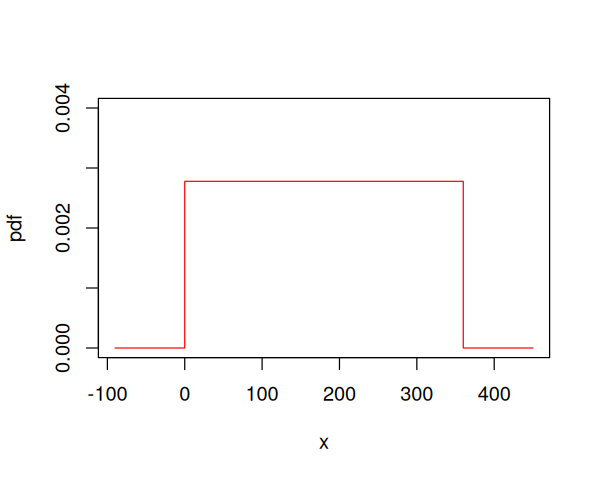

In [21]:
# plot the probability density function

wid <- 0.001
x <- seq(-90, 450, wid)
pdf <- dunif(x, a, b) # a uniform distribution between 0 and 360

set_plot_dimensions(5, 4)
plot(x, pdf, xlab = "x", ylim = c(0, 0.004), type = "l", col = "red")


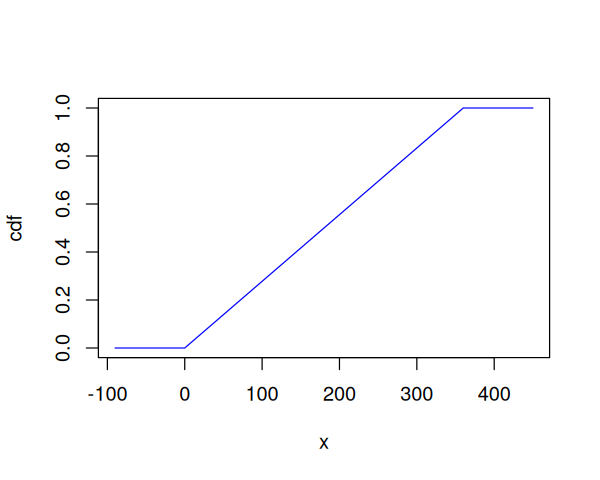

In [22]:
# plot the cumulative distribution function

cdf <- punif(x, a, b) # a uniform distribution between 0 and 360

set_plot_dimensions(5, 4)
plot(x, cdf, xlab = "x", ylim = c(0, 1), type = "l", col = "blue")


In [23]:
# the expected value = 0.5 * (a + b)

expectation <- sum(x * pdf * wid) # approximates the integral of (x * pdf(x))
expectation


[1] 180.0005

In [24]:
# the variance = 1/12 * (b - a)^2

# approximating the integral of [(x - expectation)^2 * pdf] dx
variance <- sum((x - expectation)^2 * pdf * wid)
variance


[1] 10800.09

What is the probability of spinning an angle between 90 and 180 degrees?

In [25]:
punif(180, a, b) - punif(90, a, b) # using the CDF


[1] 0.25

### Exponential Distribution

The **exponential distribution** describes waiting times between Poisson events.

$$X \sim \text{exp}(\lambda)$$

e.g. time until a single U-238 atom decays.


$$
\begin{align*}
  f(x) &= \lambda e^{-\lambda x}
\\
\\
\mathbb{E}X &= \frac{1}{\lambda}
\\
\\
\text{Var}X &= \frac{1}{\lambda^2}
\end{align*}
$$



In [26]:
# X describes the time until the first meteorite impact, in years.

lambda <- 4 # e.g. an average of 4 meteorite impacts per year.


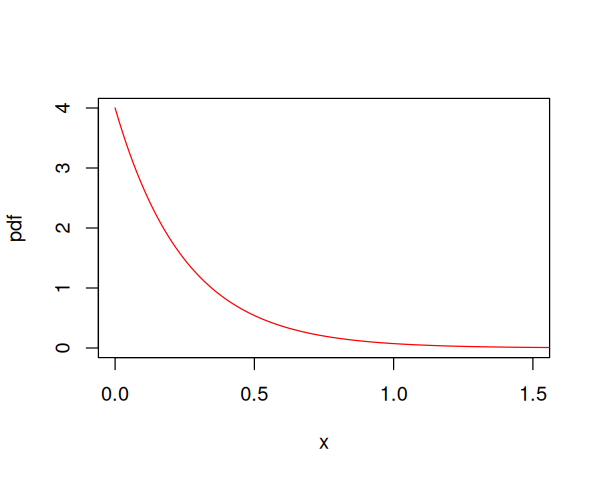

In [27]:
# plot the probability density function

wid <- 0.001
x <- seq(0, 10, wid)
pdf <- dexp(x, lambda) # an exponential distribution with rate = 4

set_plot_dimensions(5, 4)
plot(x, pdf, xlab = "x", xlim = c(0, 1.5), type = "l", col = "red")


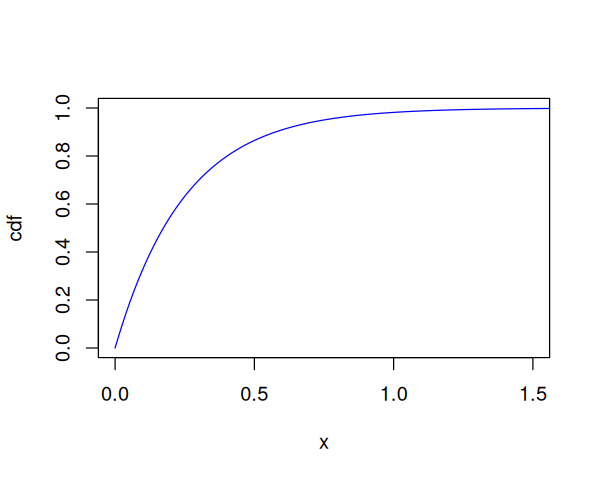

In [28]:
# plot the cumulative distribution function

cdf <- pexp(x, lambda)

set_plot_dimensions(5, 4)
plot(x, cdf, xlab = "x", xlim = c(0, 1.5), ylim = c(0, 1), type = "l", col = "blue")


In [29]:
# the expected value = 1/lambda

expectation <- sum(x * pdf * wid) # approximates the integral of [x * pdf(x)] dx
expectation


[1] 0.2499997

In [30]:
# the variance = (1/lambda)^2

# approximating the integral of [(x - expectation)^2 * pdf] dx
variance <- sum((x - expectation)^2 * pdf * wid)
variance


[1] 0.06262525

Find the probability of observing a meteorite impact during the first half of the year.

In [31]:
pexp(0.5, lambda)


[1] 0.8646647

### Normal Distribution

The **normal distribution** (also known as the Gaussian distribution) describes many situations associated with measurement. Its parameters are the *mean*, $\mu$, and the *variance*, $\sigma^2$:

$$X \sim N(\mu,\sigma^2)$$

e.g. measured thickness of a piece of paper

$$
\begin{align*}
  f(x) &= \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{(x-\mu)^2}{2\sigma^2}}
\\
\\
\mathbb{E}X &= \mu
\\
\\
\text{Var}X &= \sigma^2
\end{align*}
$$

The normal distribution can be used as an approximation to the binomial (for large $n$) and the Poisson (for large $\lambda$).


In [32]:
# X represents paper thickness in microns
mu <- 200
sigma <- 20


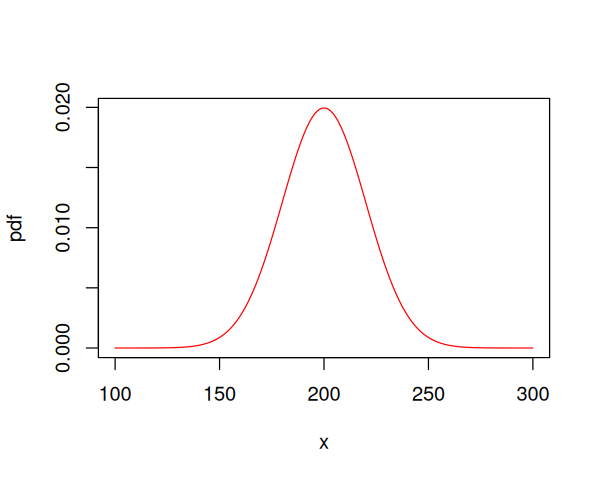

In [33]:
# plot the probability density function

wid <- 0.001
x <- seq(100, 300, wid)
pdf <- dnorm(x, mu, sigma) # a normal distribution

set_plot_dimensions(5, 4)
plot(x, pdf, xlab = "x", type = "l", col = "red")


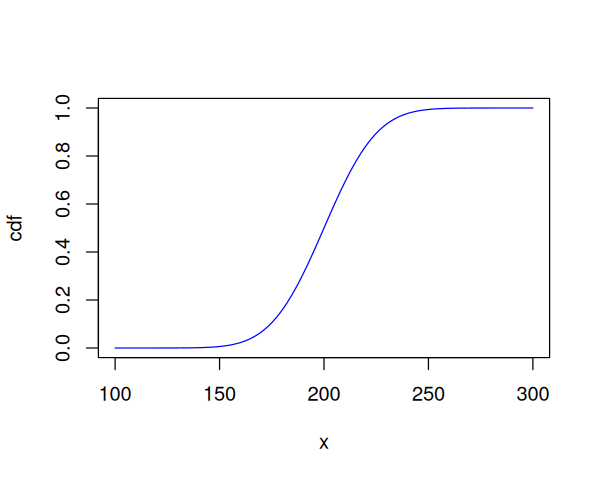

In [34]:
# plot the cumulative distribution function

cdf <- pnorm(x, mu, sigma)

set_plot_dimensions(5, 4)
plot(x, cdf, xlab = "x", ylim = c(0, 1), type = "l", col = "blue")


In [35]:
# the expected value = mu

expectation <- sum(x * pdf * wid) # approximates the integral of [x * pdf(x)] dx
expectation


[1] 199.9999

In [36]:
# the variance = (sigma)^2

# approximating the integral of [(x - expectation)^2 * pdf] dx
variance <- sum((x - expectation)^2 * pdf * wid)
variance


[1] 399.9938

What proportion of measurements are expected to be over 225 $\mu m$?

In [37]:
1 - pnorm(225, mu, sigma) # using the CDF


[1] 0.1056498

### Log-normal distribution

Many processes in biology, chemistry and the social sciences lead to variables that have **log-normal distributions**, that is, $\log{X}$ follows a normal distribution.